# World Happiness Report Project

### Project Description
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

### What is Dystopia?
Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

### What are the residuals?
The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

### What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?
The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

You need to predict the happiness score considering all the other factors mentioned in the dataset.

#### Dataset Link-
https://github.com/dsrscientist/DSData/blob/master/happiness_score_dataset.csv                                                  
https://github.com/dsrscientist/DSData


In [1]:
# importing required labraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading dataset
df = pd.read_csv("happiness_score_dataset.csv")

# our dataset
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


Our dataset has 158 rows and 12 columns. Happiness Score column is the target variable and others are features. 

In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


### Exploratory Data Analysis (EDA)

In [4]:
# checkig dimension of the dataset
df.shape
print('Total number of rows-',df.shape[0],'\nTotal number of columns-',df.shape[1])

Total number of rows- 158 
Total number of columns- 12


In [5]:
# checking the types of the columns
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

Dataset has three types of data object,int64 and float64

In [6]:
# checking null values
print("Null values in columns -")
print(df.isnull().sum())
print("\nTotal null values in dataset - ",df.isnull().sum().sum())

Null values in columns -
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

Total null values in dataset -  0


Our data has no null values

In [7]:
# creating function for checking columns unique values
def value_count(dataframe):
    for i in dataframe.columns:
        print('number of unique value in',i,'column -',df[i].nunique())
        print(dataframe[i].value_counts())
        print('\n')    

In [8]:
value_count(df)

number of unique value in Country column - 158
Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64


number of unique value in Region column - 10
Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


number of unique value in Happiness Rank column - 157
82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: Happiness Rank, Length: 157, dtype: int64


number of unique value in Happiness Score column - 157
5.192    2


In [9]:
# lets check the duplicate rows in dataset
df.duplicated().sum()

0

No duplicate rows present

World Happiness report uses six factors to calculate a country's happiness score. These six factors are Economy(GDP per Capita), Social support(Family), Health(Life Expectancy), Freedom, Trust(Government Corruption), Generosity.

In [10]:
# dropping irrelevant columns
df1 = df.drop(columns=['Country','Region','Happiness Rank','Standard Error'])
df1

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
153,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [11]:
# statistical description of dataset
df1.describe()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


### Data visualization

In [12]:
# plot
def plot(name):
    plt.figure(figsize = (20,16), facecolor = 'white')
    plotnumber = 1

    for i in name:
        if plotnumber <= 20:
            ax = plt.subplot(4 , 4 , plotnumber)
            plot_name(name[i],color='orange')
            plt.xlabel(i, fontsize = 12)
            plotnumber +=1
    plt.show()

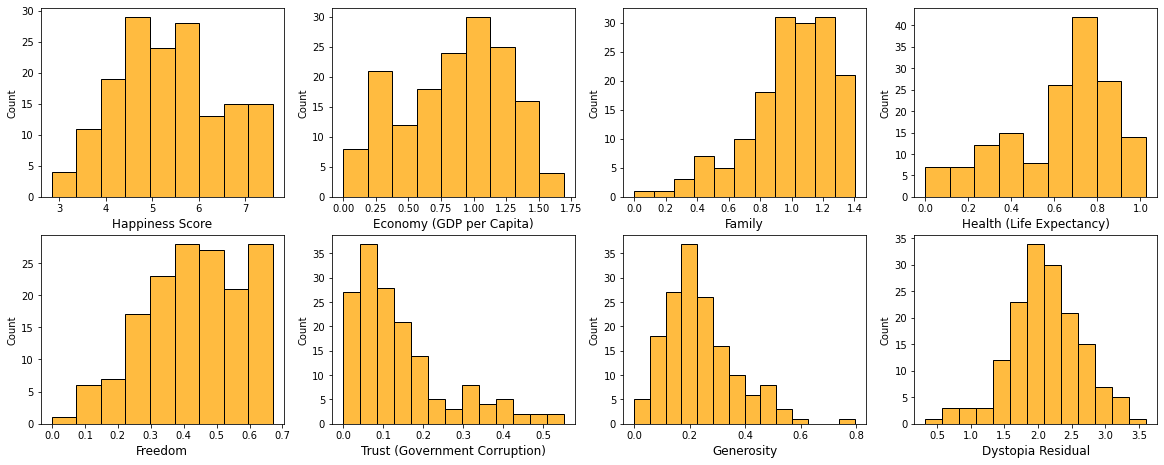

In [13]:
# histogram plot
plot_name = sns.histplot
plot(df1)

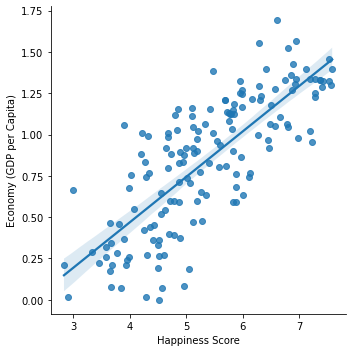

In [14]:
sns.lmplot(x='Happiness Score',y='Economy (GDP per Capita)',data=df)
plt.show()

Hppiness score and Economy have strong positive correlation

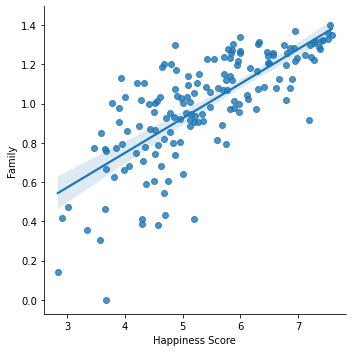

In [15]:
sns.lmplot(x='Happiness Score',y='Family',data=df)
plt.show()

Family and Happiness score have strong positive correlation.

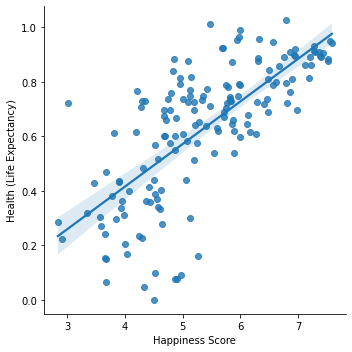

In [16]:
sns.lmplot(x='Happiness Score',y='Health (Life Expectancy)',data=df)
plt.show()

Health and Happiness score have strong positive correlation

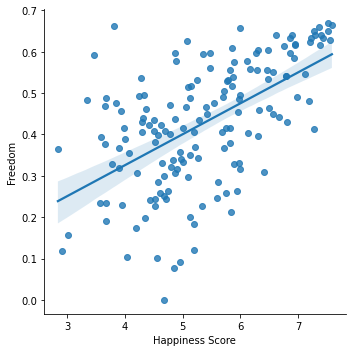

In [17]:
sns.lmplot(x='Happiness Score',y='Freedom',data=df)
plt.show()

Freedom and Happiness score have positive correlation.

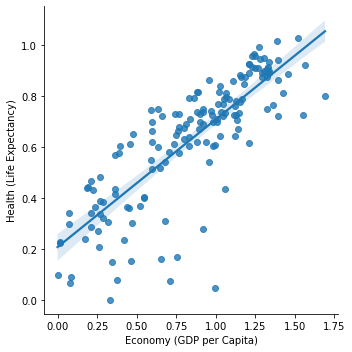

In [18]:
sns.lmplot(x='Economy (GDP per Capita)',y='Health (Life Expectancy)',data=df)
plt.show()

Health and Economy have strong positive correlation.

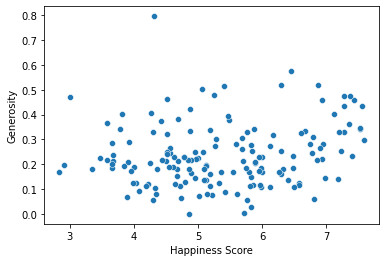

In [19]:
sns.scatterplot(x='Happiness Score',y='Generosity',data=df)
plt.show()

Generosity and Happiness score have no relation.

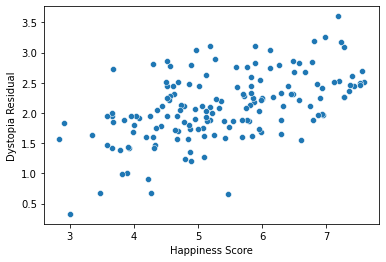

In [20]:
sns.scatterplot(x='Happiness Score',y='Dystopia Residual',data=df)
plt.show()

Dystopia Residual and Happiness score have positive correlation but not strong

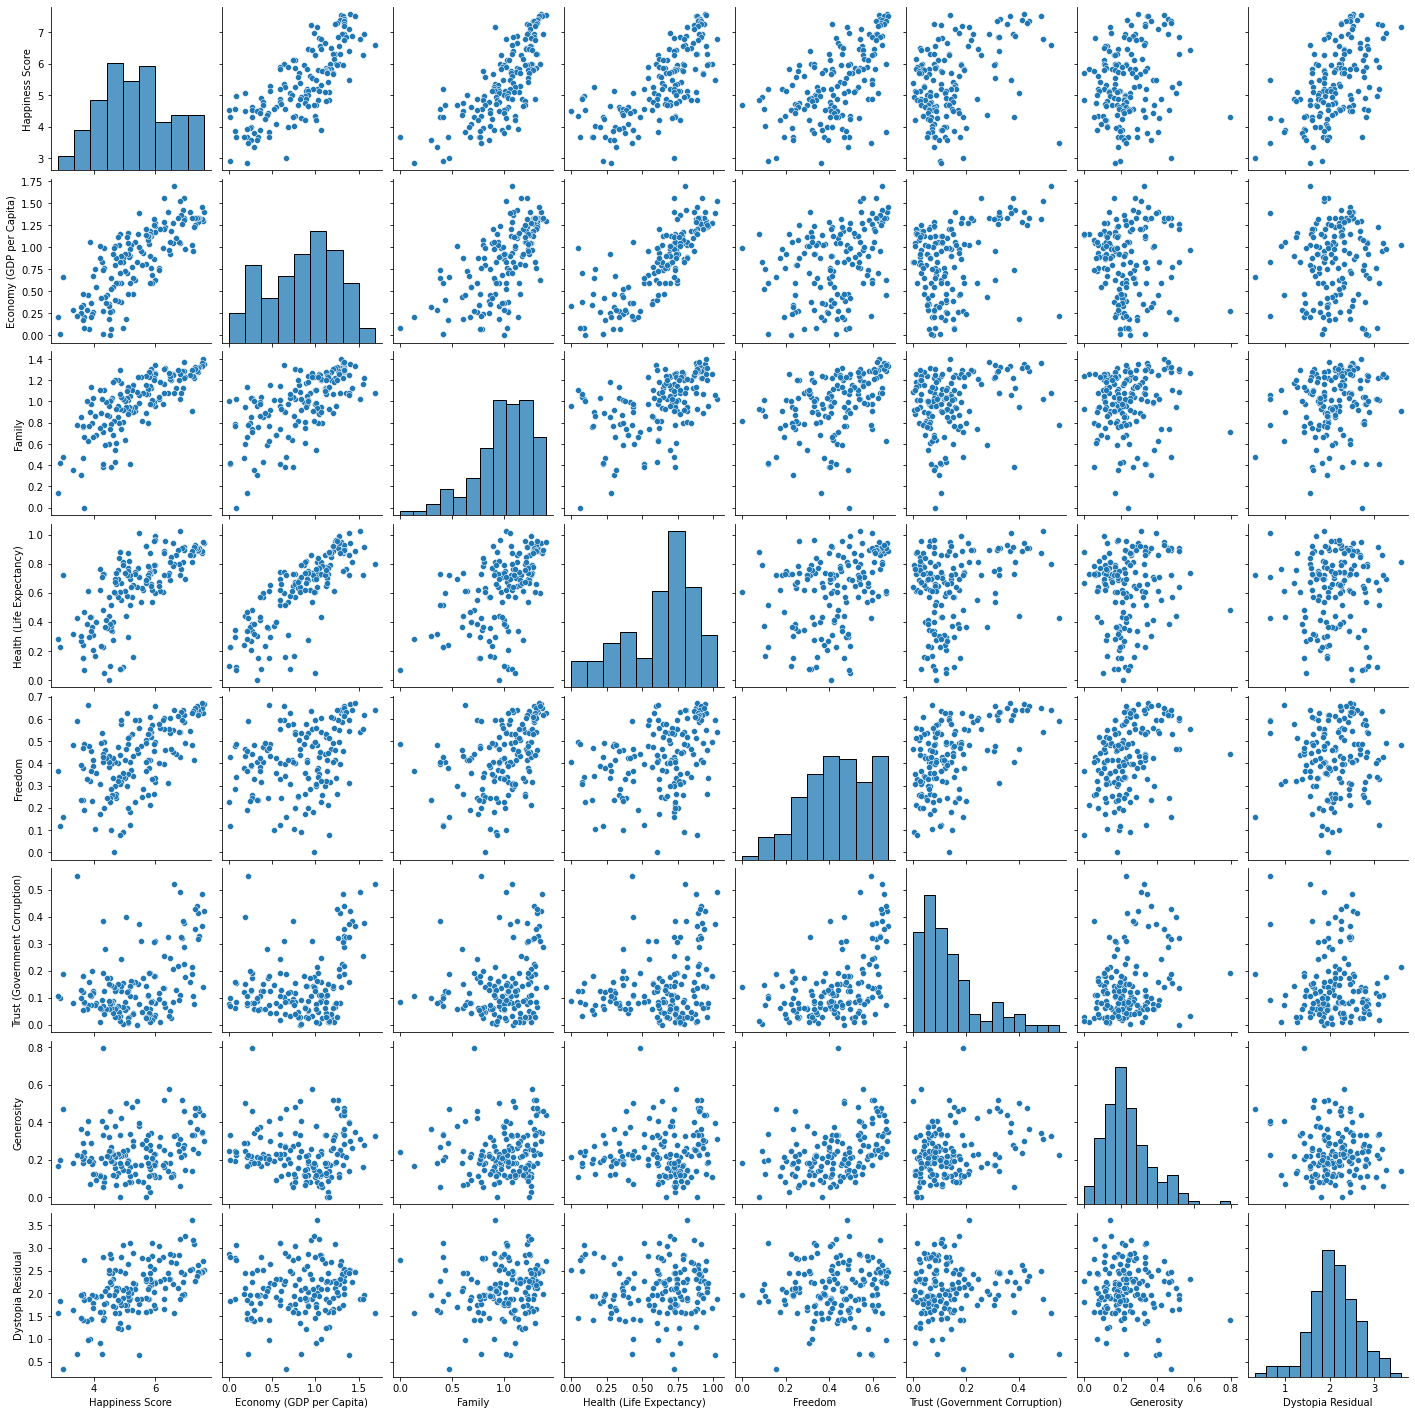

In [21]:
sns.pairplot(df1)

here we can see the relation between features and target variable

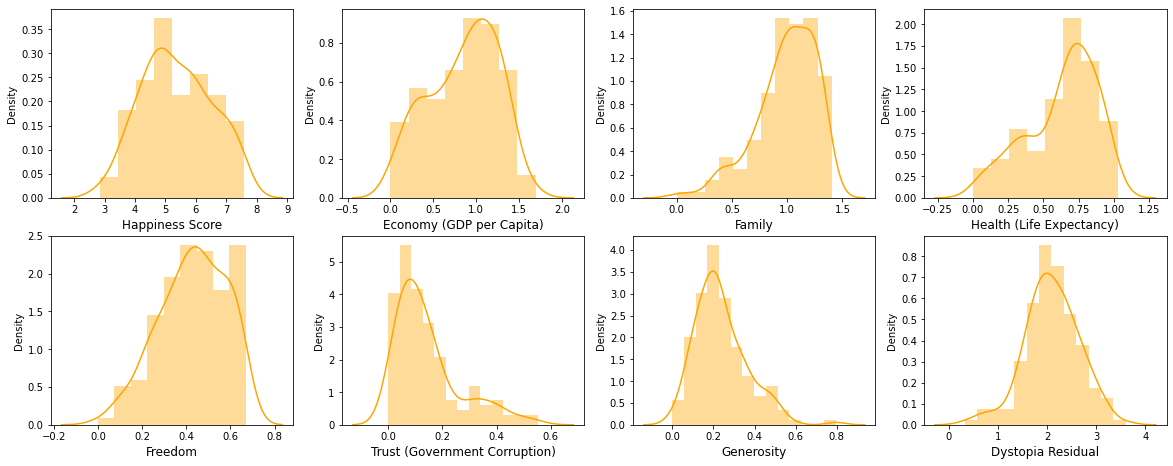

In [23]:
# Distribution plot
plot_name = sns.distplot
plot(df1)

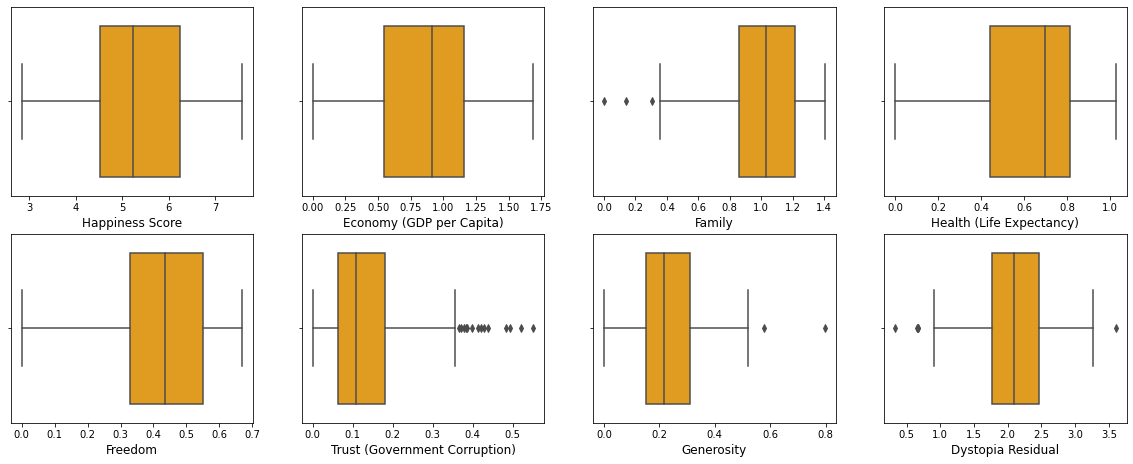

In [24]:
# box plot
plot_name = sns.boxplot
plot(df1)

World Happiness Report uses data from the Gallup World Poll surveys. Happiness score is based on answers to the main life evaluation question asked in the poll. Gallup interviews approximately 1,000 residents per country each year. Gallup interviews these people in over 130 countries around the world. Each respondent in this happiness survey is asked the same questions. They use responses from the three most recent years to provide an up-to-date and robust estimate of life evaluations. The number of people and countries surveyed varies year to year, but by and large more than 100,000 people in 130 countries participate in the Gallup World Poll each year. Since data are based entirely on the survey no need work on skewness and outliers.

In [25]:
# checking correlation
df1.corr()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Economy (GDP per Capita),0.780966,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.740605,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.724200,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.568211,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.395199,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.180319,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,0.530474,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


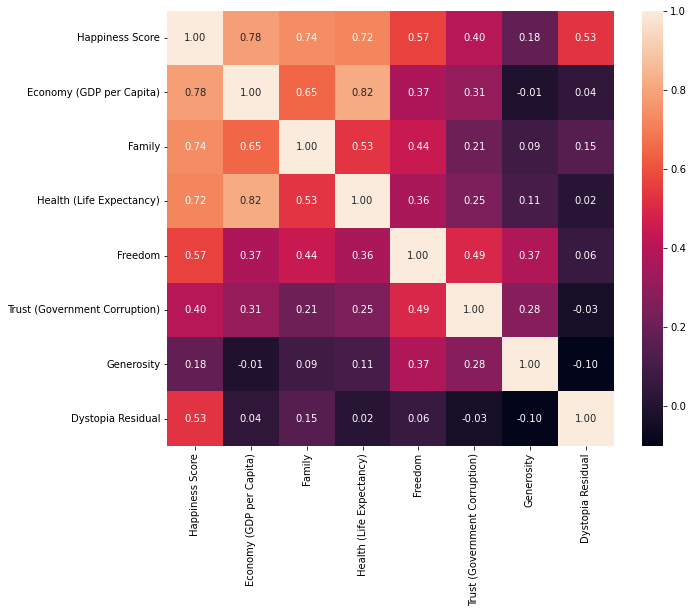

In [26]:
# heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(),annot=True,fmt=".2f")
plt.show()

Happiness score, Economy(GDP per Capita), Family and Health(Life Expectancy) have strong positive correlation.

In [27]:
# separating columns
x = df1.drop(columns = ['Happiness Score'])                 # features
y = df1['Happiness Score']                                  # target variable

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [29]:
x = pd.DataFrame(x_scaler,columns=x.columns)
x

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,1.135226,1.514458,1.289434,1.332456,-0.016480,1.575856,1.092857
2,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...
153,-1.552987,-0.800520,-0.818610,1.087740,3.413922,-0.087228,-2.588925
154,-1.392303,-2.346860,-1.263362,0.372033,-0.529210,-0.433117,-0.843967
155,-0.455245,-1.901086,0.372199,-1.809238,0.381419,1.856891,-3.208430
156,-2.067566,-2.118467,-1.649648,-2.064472,-0.357715,-0.316950,-0.481985


In [30]:
# checking variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features']=x.columns
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,Features,vif values
0,Economy (GDP per Capita),4.088959
1,Family,1.944328
2,Health (Life Expectancy),3.157781
3,Freedom,1.749104
4,Trust (Government Corruption),1.421872
5,Generosity,1.289134
6,Dystopia Residual,1.049255


Since all vif values are less than 5 no need to work on it

In [31]:
# importing required libraries
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [32]:
# creating lists of models
LR = LinearRegression()
RFR = RandomForestRegressor()
LS = Lasso()
DTR = DecisionTreeRegressor()
GBR = GradientBoostingRegressor()
KNN = KNeighborsRegressor()
ETR = ExtraTreesRegressor()
svr = SVR()

model_list= [LR,RFR,LS,DTR,GBR,KNN,ETR,svr]

In [33]:
# maximum accuracy and best random state
def model_rs(model):
    max_acc = 0
    max_rs = 0
    for i in range(1,200):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=i)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        acc = r2_score(y_test,y_pred)
        if acc>max_acc:
            max_acc=acc
            max_rs = i
    print('maximum accuracy=',max_acc,'\nbest random state=',max_rs)

In [34]:
# maximum accuracy at random state
model_rs(LR)

maximum accuracy= 0.9999999642713742 
best random state= 148


In [35]:
# train-test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=148)

In [36]:
# r2 score, mean absolute error, mean squared error, root mean squared error and cross validation
def model(name):
    name.fit(x_train,y_train)
    y_pred=name.predict(x_test)
    train_pred = name.predict(x_train)
    score_r2 = r2_score(y_test,y_pred)
    train_score = r2_score(y_train,train_pred)
    MAE = mean_absolute_error(y_test,y_pred)
    MSE = mean_squared_error(y_test,y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
    print('r2 score =',score_r2,'\nr2 score on training data =',train_score,'\nMean absolute error =',MAE,
          '\nMean squared error =',MSE,'\nRoot mean squared error =',RMSE)
    
    print('\nCross validation:-\n')
    score_cv = cross_val_score(name,x,y)
    cv_mean = score_cv.mean()
    diff = (score_r2 - cv_mean)*100
    print('cross validation scores:-',score_cv,'\ncross validation mean score:-',cv_mean,
          '\nDifference between r2 score and cross validation mean score =',diff)

In [37]:
# All models
for i in model_list:
    print('\n__________________ Using',i,'_________________\n')
    model(i)


__________________ Using LinearRegression() _________________

r2 score = 0.9999999642713742 
r2 score on training data = 0.9999999240329217 
Mean absolute error = 0.00021593036646449146 
Mean squared error = 6.439951545850215e-08 
Root mean squared error = 0.00025377059612670286

Cross validation:-

cross validation scores:- [0.99999946 0.99999835 0.99999837 0.99999536 0.99999943] 
cross validation mean score:- 0.9999981947416543 
Difference between r2 score and cross validation mean score = 0.00017695297198638826

__________________ Using RandomForestRegressor() _________________

r2 score = 0.8568297045682818 
r2 score on training data = 0.9874030348169073 
Mean absolute error = 0.39480125000000016 
Mean squared error = 0.2580591174625 
Root mean squared error = 0.5079951943301235

Cross validation:-

cross validation scores:- [-6.86310409 -0.67085944 -0.94688179 -1.37007356 -5.70874986] 
cross validation mean score:- -3.111933748217477 
Difference between r2 score and cross valida

Our best model is Linear regression. It has least difference between r2 score and cross validation mean score.

In [38]:
# final model
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
score_r2 = r2_score(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
print('r2 score =',score_r2,'\nMean absolute error =',MAE,'\nMean squared error =',MSE,'\nRoot mean squared error =',RMSE)

r2 score = 0.9999999642713742 
Mean absolute error = 0.00021593036646449146 
Mean squared error = 6.439951545850215e-08 
Root mean squared error = 0.00025377059612670286


In [39]:
# lets check difference between actual and predicted happiness score
Y = pd.DataFrame({'Actual happiness score':y_test,'Predicted happiness score':y_pred, 'difference':(y_test-y_pred)})
# print
Y.head()

,Actual happiness score,Predicted happiness score,difference
134,4.194,4.194334,-0.000334
118,4.518,4.517830,0.000170
22,6.810,6.810239,-0.000239
91,5.013,5.013087,-0.000087
122,4.507,4.507210,-0.000210


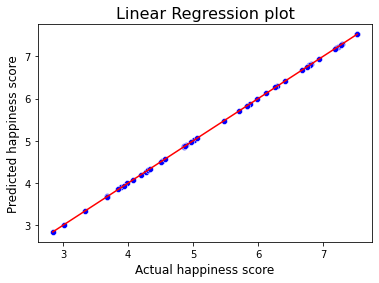

In [40]:
# Linear regression plot
sns.scatterplot(y_test,y_pred, color='blue')
sns.lineplot(y_test,y_pred,color='red')
plt.xlabel('Actual happiness score', fontsize=12)
plt.ylabel('Predicted happiness score', fontsize= 12)
plt.title('Linear Regression plot', fontsize=16)
plt.show()